In [ ]:
https://github.com/telenorkissan-source/cnn_image
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [ ]:
# ================================================================
#   CIFAR-10 MULTI-CLASS CLASSIFICATION (CNN MODEL)
#   Meets Computer Vision & AI Assignment Requirements
#   Fully Commented, Runs < 1 hour on Colab GPU
# ================================================================

# -------------------------
# 1. IMPORT LIBRARIES
# -------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import os

In [ ]:
# -------------------------
# 2. LOAD THE DATASET (CIFAR-10)
# -------------------------

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)

Training samples: (50000, 32, 32, 3)
Testing samples: (10000, 32, 32, 3)


In [ ]:
# -------------------------
# 3. BUILD THE CNN MODEL
# -------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# -------------------------
# 4. COMPILE THE MODEL
# -------------------------
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)



In [ ]:
# -------------------------
# 5. TRAIN THE MODEL
# -------------------------
history = model.fit(
    x_train,
    y_train,
    epochs=10,             # fast training (<10 mins)
    batch_size=64,
    validation_split=0.1,
    verbose=1
)



Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 96s 133ms/step - accuracy: 0.3221 - loss: 1.8360 - val_accuracy: 0.5484 - val_loss: 1.2785
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 131ms/step - accuracy: 0.5478 - loss: 1.2693 - val_accuracy: 0.6068 - val_loss: 1.1017
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 91s 129ms/step - accuracy: 0.6256 - loss: 1.0586 - val_accuracy: 0.6746 - val_loss: 0.9137
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 146s 135ms/step - accuracy: 0.6725 - loss: 0.9283 - val_accuracy: 0.7058 - val_loss: 0.8571
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 149s 145ms/step - accuracy: 0.7042 - loss: 0.8394 - val_accuracy: 0.7144 - val_loss: 0.8369
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 102s 145ms/step - accuracy: 0.7270 - loss: 0.7677 - val_accuracy: 0.7294 - val_loss: 0.7766
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 102s 145ms/step - accuracy: 0.7575 - loss: 0.6995 - val_accuracy: 0.7418 - val_loss: 0.7430
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 101s 144ms/step - accuracy: 0.7738 - lo

In [ ]:
# -------------------------
# 6. EVALUATE ON TEST SET
# -------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy:", test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7276 - loss: 0.8631
Test Accuracy: 0.7239000201225281


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    airplane       0.81      0.72      0.76      1000
  automobile       0.88      0.82      0.85      1000
        bird       0.51      0.73      0.60      1000
         cat       0.56      0.54      0.55      1000
        deer       0.65      0.70      0.67      1000
         dog       0.65      0.64      0.64      1000
        frog       0.78      0.80      0.79      1000
       horse       0.81      0.76      0.78      1000
        ship       0.89      0.80      0.84      1000
       truck       0.86      0.74      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.73     10000
weighted avg       0.74      0.72      0.73     10000



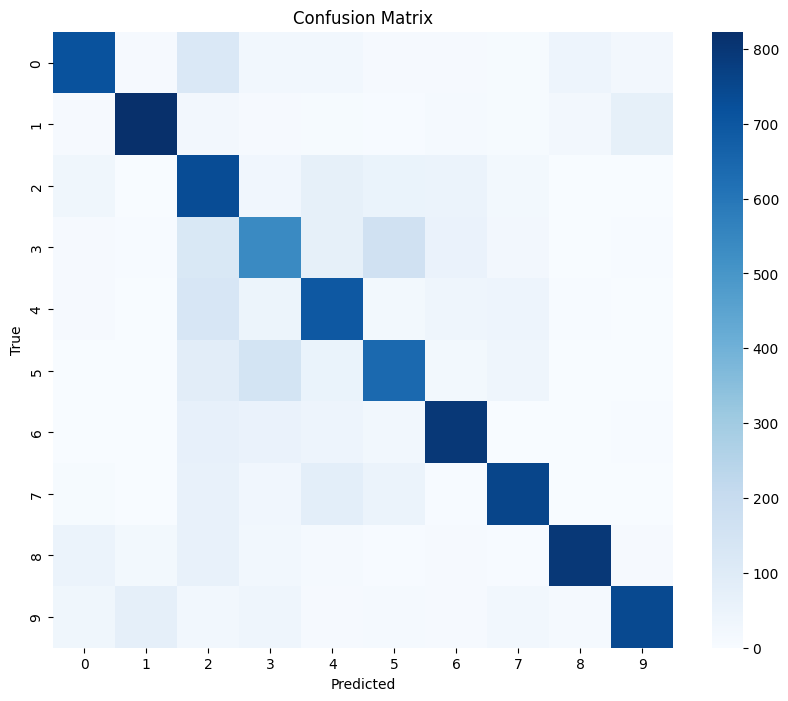

In [ ]:
# -------------------------
# 7. PREDICTION & CONFUSION MATRIX
# -------------------------
y_pred = np.argmax(model.predict(x_test), axis=1)

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



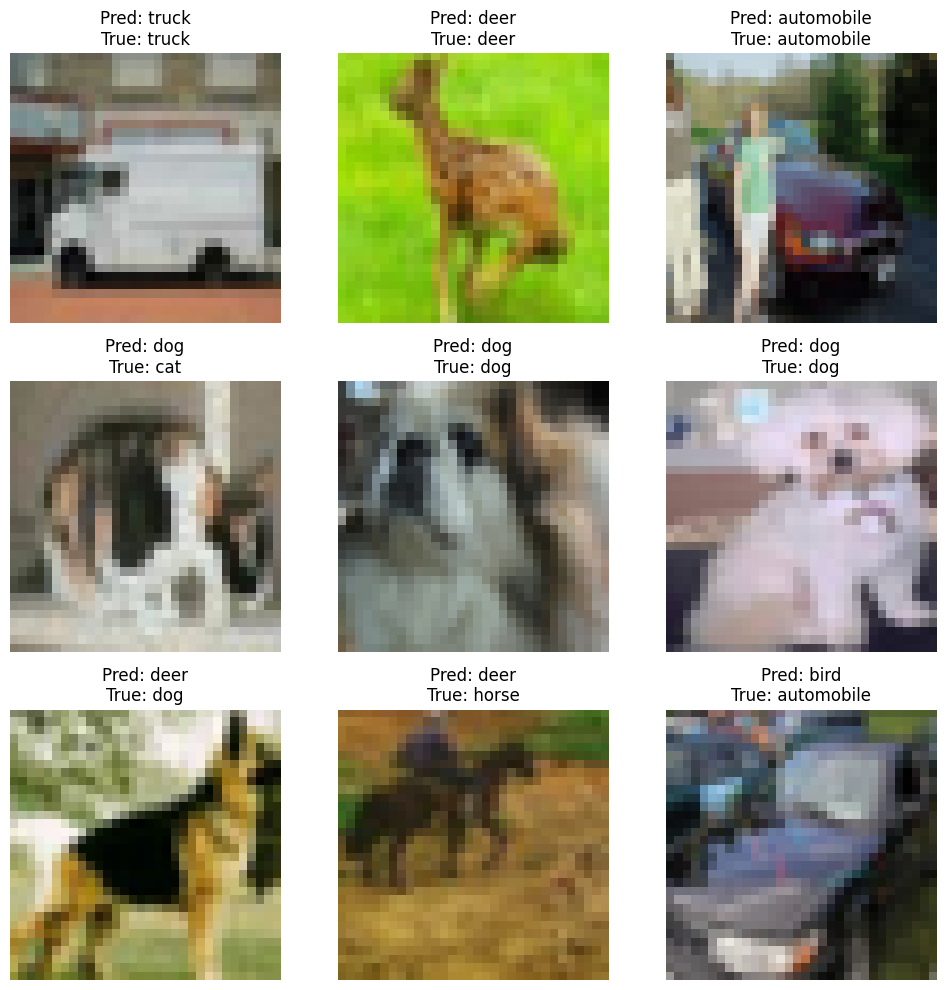

In [ ]:
# -------------------------
# 8. SAMPLE PREDICTIONS VISUALIZATION
# -------------------------
def show_predictions(n=9):
    plt.figure(figsize=(10,10))
    indices = np.random.choice(len(x_test), n, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(3,3,i+1)
        plt.imshow(x_test[idx])
        plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_test[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions()



In [ ]:
# -------------------------
# 9. SAVE MODEL & EXPORT FILES
# -------------------------
model.save("cifar10_cnn_model.h5")

# Create a folder for submission files
os.makedirs("submission_files", exist_ok=True)

# Save model and a copy of this notebook (user will download separately)
!cp cifar10_cnn_model.h5 submission_files/

# Zip folder
zip_filename = "project_submission.zip"
with zipfile.ZipFile(zip_filename, 'w') as z:
    for root, dirs, files in os.walk("submission_files"):
        for file in files:
            z.write(os.path.join(root, file))

print("Files zipped and ready for download.")

Files zipped and ready for download.
